# 🎮 GameRx | Mapping Emotions Across Game Genres

#### Purpose  
- Explore how emotions appear across **different game genres**  
- Use the **hybrid relief dataset** built earlier  

#### 📂 Input  
- `06_games_emotion_relief_full.csv` *(from Notebook 06)*

#### Why It Matters  
- Turns hybrid data into **clear, visual insights**  
- Shows how games support **Comfort, Catharsis, Distraction, and Validation**  
- Helps connect emotional tone → genre type  

#### Questions to Explore  
- Which emotions dominate each genre?  
- Do action-heavy games show higher emotional intensity?  
- Which genres feel the most balanced or varied?

#### Visuals to Create  
- 📊 Grouped + stacked bar charts  
- 🔥 Heatmaps for quick comparisons  
- ☁️ Word clouds (optional flavor layer)  

#### Outcome  
- Clear visuals for **storytelling + app integration**  
- A visual “map” of how genres meet emotional needs 

## Table of Contents  

1. [Import Libraries](#1-import-libraries)  
2. [Load Dataset](#2-load-dataset)  
3. [Inspect Columns](#3-inspect-columns)  
4. [Prepare Data for Visualization](#4-prepare-data-for-visualization)  
5. [Top Genres per Relief Tag](#5-top-genres-per-relief-tag)  
6. [Emotion Intensity Heatmap by Genre](#6-emotion-intensity-heatmap-by-genre)  
7. [Word Cloud by Relief Type](#7-word-cloud-by-relief-type)
8. [Joy-to-Anger Ratio](#8-joy-to-anger-ratio)  
9. [Insights & Observations](#8-insights--observations)
10. [Export Final Datasets](#10-export-final-datasets)
11. [Next Steps](#10-next-steps)  

---

## 1. Import Libraries  

**What I’m doing:**  
Load the tools I will use for:  
- Data handling  
- Visualizations  
- Cleaning + setup  

Keep it simple, this step just gets everything ready.

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Style settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['font.family'] = 'DejaVu Sans'

print("Libraries imported successfully ✅")

Libraries imported successfully ✅


---

## 2. Load Hybrid Emotion Dataset  

Loading both hybrid datasets, one focused on *emotions + relief* (review-level),  
and one focused on *genres + relief* (game-level).   

Together, they’ll let us explore:
- Emotion patterns by relief tag  
- Genre trends for emotional relief

### 📂 File Overview  
**05_steam_relief_reviews_enriched.csv** → has emotions + relief tags  
→ perfect for emotion heatmaps, emotion-intensity visuals, and correlations  

**06_games_emotion_relief_full.csv** → has game + genre + relief tag mappings  
→ perfect for top genres per relief, genre-relief distributions, and app recommendations  

In [20]:
# Review-level hybrid (emotions + reliefs)
file_emotion = "../02 Data/cleaned/05_steam_relief_reviews_enriched.csv"
df_emotion = pd.read_csv(file_emotion, low_memory=False)

# Game-level hybrid (genres + reliefs)
file_genre = "../02 Data/cleaned/06_games_emotion_relief_full.csv"
df_genre = pd.read_csv(file_genre, low_memory=False)

print("✅ Datasets loaded successfully!")
print(f"Emotion-level shape: {df_emotion.shape}")
print(f"Genre-level shape:   {df_genre.shape}")

# Show a few rows from each
print("\n🧩 Emotion-level preview:")
display(df_emotion.head())

print("\n🎮 Genre-level preview:")
display(df_genre.head())

✅ Datasets loaded successfully!
Emotion-level shape: (27, 37)
Genre-level shape:   (105008, 26)

🧩 Emotion-level preview:


,AppID,Name,genre_list,primary_genre,genre_count,Name_review,Review,review_score,review_votes,review_clean,...,fear_per_100w,joy_per_100w,sadness_per_100w,surprise_per_100w,trust_per_100w,positive_per_100w,negative_per_100w,primary_emotion,emotion_richness,normalized_intensity
0,10140,3D Ultra™ Minigolf Adventures,['Sports'],Sports,1,3D Ultra Minigolf Adventures Deluxe,this is so dark chocolate,1.0,0.0,this is so dark chocolate,...,0.000000,20.0,20.000000,0.0,20.0,20.000000,0.000000,anticipation,5,1.000000
1,10240,A Stroke of Fate: Operation Valkyrie,['Adventure'],Adventure,1,Stroke of Fate: Operation Valkyrie,A promising premise ruined by an irritating po...,-1.0,0.0,A promising premise ruined by an irritating po...,...,5.263158,0.0,5.263158,0.0,0.0,5.263158,15.789474,negative,6,0.526316
2,10120,Aces of the Galaxy™,"['Action', 'Casual']",Action,2,Aces of the Galaxy,"Crashes to desktop on boot, waste of money.",-1.0,0.0,"Crashes to desktop on boot, waste of money.",...,0.000000,12.5,0.000000,12.5,12.5,12.500000,12.500000,anger,8,1.000000
3,104200,BEEP,"['Adventure', 'Indie']",Adventure,2,BEEP,"Boring, repetitive, waste of money",-1.0,0.0,"Boring, repetitive, waste of money",...,0.000000,20.0,0.000000,20.0,20.0,20.000000,20.000000,anger,8,1.600000
4,10090,Call of Duty: World at War,['Action'],Action,1,Call of Duty: World at War,love the god damn game!,1.0,0.0,love the god damn game!,...,20.000000,40.0,0.000000,0.0,20.0,40.000000,20.000000,joy,8,2.000000



🎮 Genre-level preview:


,AppID,Name,Release date,About the game,Languages,Metacritic score,User score,Positive,Negative,Recommendations,...,Categories,Genres,Tags,genre_list,primary_genre,genre_count,relief_tag_genre,relief_tag_review,hybrid_relief_tag,relief_tag
0,20200,Galactic Bowling,10/21/2008,Galactic Bowling is an exaggerated and stylize...,['English'],0,0,6,11,30,...,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling","['Casual', 'Indie', 'Sports']",Casual,3,Comfort,NaN,Comfort,Comfort
1,655370,Train Bandit,10/12/2017,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",0,0,53,5,12,...,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...","['Action', 'Indie']",Action,2,Catharsis,NaN,Catharsis,Catharsis
2,1732930,Jolt Project,11/17/2021,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",0,0,0,0,0,...,Single-player,"Action,Adventure,Indie,Strategy",NaN,"['Action', 'Adventure', 'Indie', 'Strategy']",Action,4,Catharsis,NaN,Catharsis,Catharsis
3,1355720,Henosis™,7/23/2020,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",0,0,3,0,0,...,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...","['Adventure', 'Casual', 'Indie']",Adventure,3,Validation,NaN,Validation,Validation
4,1139950,Two Weeks in Painland,2/3/2020,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",0,0,50,8,17,...,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...","['Adventure', 'Indie']",Adventure,2,Validation,NaN,Validation,Validation


---

## 3. Inspect Columns  

Quick sanity check before visualizing.  
Looking at:  
- Column names  
- Data types  
- Missing or weird values  

This helps confirm everything loaded clean and matches what we expect from Notebook 06.  

In [11]:
# Look at all column names
print("🧩 Columns in dataset:\n")
print(df.columns.tolist())

# Check data types and non-null counts
print("\n📊 Data overview:\n")
print(df.info())

# Peek at the first few rows
df.head()

🧩 Columns in dataset:

['AppID', 'Name', 'Release date', 'About the game', 'Languages', 'Metacritic score', 'User score', 'Positive', 'Negative', 'Recommendations', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'genre_list', 'primary_genre', 'genre_count', 'relief_tag_genre', 'relief_tag_review', 'hybrid_relief_tag', 'relief_tag']

📊 Data overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105008 entries, 0 to 105007
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   AppID                       105008 non-null  int64 
 1   Name                        105008 non-null  object
 2   Release date                105008 non-null  object
 3   About the game              104860 non-null  object
 4   Languages                   105008 non-null  object
 5   Metac

,AppID,Name,Release date,About the game,Languages,Metacritic score,User score,Positive,Negative,Recommendations,...,Categories,Genres,Tags,genre_list,primary_genre,genre_count,relief_tag_genre,relief_tag_review,hybrid_relief_tag,relief_tag
0,20200,Galactic Bowling,10/21/2008,Galactic Bowling is an exaggerated and stylize...,['English'],0,0,6,11,30,...,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling","['Casual', 'Indie', 'Sports']",Casual,3,Comfort,NaN,Comfort,Comfort
1,655370,Train Bandit,10/12/2017,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",0,0,53,5,12,...,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...","['Action', 'Indie']",Action,2,Catharsis,NaN,Catharsis,Catharsis
2,1732930,Jolt Project,11/17/2021,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",0,0,0,0,0,...,Single-player,"Action,Adventure,Indie,Strategy",NaN,"['Action', 'Adventure', 'Indie', 'Strategy']",Action,4,Catharsis,NaN,Catharsis,Catharsis
3,1355720,Henosis™,7/23/2020,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",0,0,3,0,0,...,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...","['Adventure', 'Casual', 'Indie']",Adventure,3,Validation,NaN,Validation,Validation
4,1139950,Two Weeks in Painland,2/3/2020,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",0,0,50,8,17,...,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...","['Adventure', 'Indie']",Adventure,2,Validation,NaN,Validation,Validation


### 🔍 Results: Column Check Summary  

**Dataset loaded successfully**  
I confirmed everything imported correctly from Notebook 06.

#### ⚡Quick facts  
- **Total rows:** 105,008  
- **Total columns:** 26  
- Most columns are `object` type (text-based)  
- Numeric ones handle review scores and counts  

#### 🗝️ Key columns spotted  
- `AppID`, `Name`, `Release date` → Game basics  
- `Positive`, `Negative`, `Recommendations` → Review stats  
- `Genres`, `Tags`, `primary_genre`, `genre_count` → Game classification  
- `relief_tag_genre`, `relief_tag_review`, `hybrid_relief_tag`, `relief_tag` → Relief mapping  

#### ❓ What this means  
- The hybrid dataset includes both **genre info** and **emotion-relief labels**.  
- It’s ready for visual analysis, no major missing data or broken columns.  

#### Next step  
I’ll **clean and prepare** the columns needed for visuals, focusing on  
`primary_genre` and `hybrid_relief_tag` for grouped charts.  

----

## 4. Prepare Data for Visualization  

**What I’m doing:**  
Get the dataset ready for charts and visuals.  
 
- Keep only the columns we need  
- Drop empty or duplicate rows  
- Focus on `primary_genre` and `hybrid_relief_tag`  
- Count how many games fall under each combo  

This keeps things clean and easy to work with when we start plotting.

In [5]:
# Select only the columns needed for visual analysis
df_viz = df[['AppID', 'Name', 'primary_genre', 'hybrid_relief_tag']].copy()

# Drop missing or empty values in key columns
df_viz = df_viz.dropna(subset=['primary_genre', 'hybrid_relief_tag'])

# Check for duplicates and remove if needed
df_viz = df_viz.drop_duplicates(subset=['AppID', 'primary_genre', 'hybrid_relief_tag'])

# Quick preview
print("✅ Data prepared for visualization!")
print("Rows:", len(df_viz))
df_viz.head()

✅ Data prepared for visualization!
Rows: 105008


,AppID,Name,primary_genre,hybrid_relief_tag
0,20200,Galactic Bowling,Casual,Comfort
1,655370,Train Bandit,Action,Catharsis
2,1732930,Jolt Project,Action,Catharsis
3,1355720,Henosis™,Adventure,Validation
4,1139950,Two Weeks in Painland,Adventure,Validation


### 🔍 Results: Data Prepared for Visualization  

**Dataset cleaned and ready**  
Now the dataset has the key columns needed for genre–relief visuals.

#### ⚡Quick facts  
- **Rows:** 105,008  
- **Columns used:** `AppID`, `Name`, `primary_genre`, `hybrid_relief_tag`  
- No missing or duplicate entries after cleaning

#### ❓What this means  
Each game now links directly to one **primary genre** and one **hybrid relief tag**.  
This gives us a clean structure to count and visualize emotional patterns across genres.  

#### Next step  
I’ll group the data to find **top genres per relief tag** and build the first visual. 

---

## 5. Top Genres per Relief Tag  

**What I’m doing:**  
See which game genres appear most often under each **relief tag**.  
This helps show patterns like:  
- Comfort → cozy or casual genres  
- Catharsis → intense or action-heavy genres  
- Distraction → light or fast-paced genres  
- Validation → story-rich or emotional genres  

Now i will count games by genre and relief tag, then build a **grouped bar chart** to compare them side by side.

In [6]:
# Group and count games per relief tag and genre
genre_relief_counts = (
    df_viz.groupby(['hybrid_relief_tag', 'primary_genre'])
    .size()
    .reset_index(name='count')
)

# Sort values for clarity
genre_relief_counts = genre_relief_counts.sort_values(['hybrid_relief_tag', 'count'], ascending=[True, False])

# Preview
print("✅ Top genres per relief tag grouped successfully!")
genre_relief_counts.head(10)

✅ Top genres per relief tag grouped successfully!


,hybrid_relief_tag,primary_genre,count
0,Catharsis,Action,42232
1,Catharsis,RPG,1727
2,Catharsis,Racing,577
3,Catharsis,Sports,228
7,Comfort,Casual,21428
15,Comfort,Indie,9851
12,Comfort,Free to Play,1209
23,Comfort,Violent,455
5,Comfort,Animation & Modeling,388
21,Comfort,Utilities,356


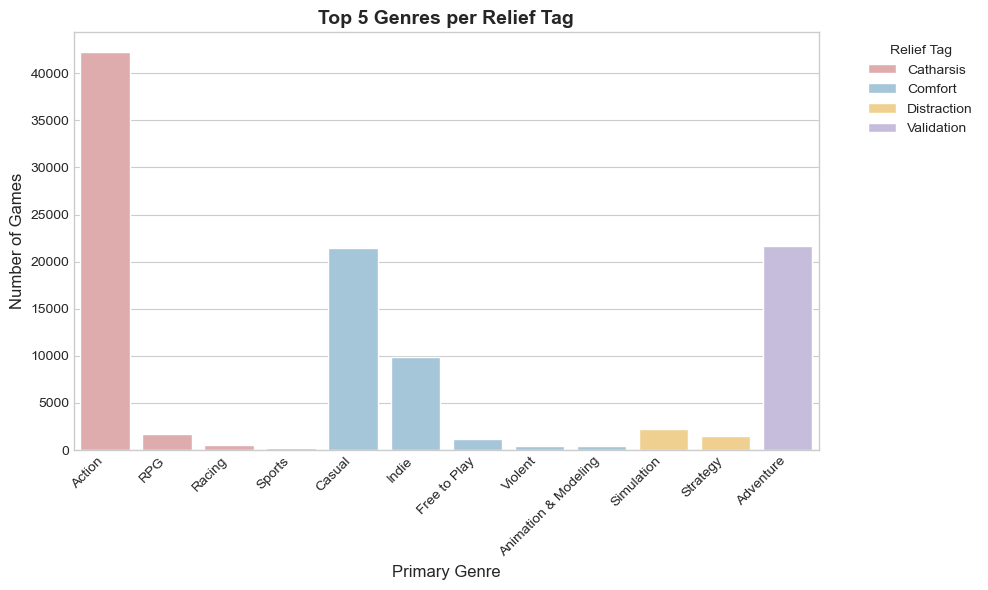

In [10]:
# Focused Grouped Bar Chart: Top 5 Genres per Relief Tag

# Get top 5 genres for each relief tag
top_genres = (
    genre_relief_counts.groupby('hybrid_relief_tag')
    .head(5)
    .reset_index(drop=True)
)

# Sort for better layout
top_genres = top_genres.sort_values(['hybrid_relief_tag', 'count'], ascending=[True, False])

# Custom colors (same palette family)
relief_colors = {
    "Comfort": "#9CC8E0",
    "Catharsis": "#E6A4A4",
    "Distraction": "#FFD580",
    "Validation": "#C4B7E0"
}

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genres,
    x='primary_genre',
    y='count',
    hue='hybrid_relief_tag',
    palette=relief_colors
)

# Labels and style
plt.title("Top 5 Genres per Relief Tag", fontsize=14, weight='bold')
plt.xlabel("Primary Genre")
plt.ylabel("Number of Games")
plt.xticks(rotation=45, ha='right')

# Legend outside
plt.legend(title="Relief Tag", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 🔍 Results: Top 5 Genres per Relief Tag  

**Chart loaded successfully**  
The visual shows which genres dominate each emotional relief tag.

#### ⚡Quick facts  
- **Catharsis:** Strongly led by **Action**, with smaller counts in RPG and Racing.  
- **Comfort:** Dominated by **Casual** and **Indie**, both linked to calm or creative play.  
- **Distraction:** Mainly **Simulation** and **Strategy** light, engaging gameplay loops.  
- **Validation:** Anchored by **Adventure**, often story-driven and emotional.  

#### ❓What this means  
Each relief tag highlights a different **emotional purpose** through genre:  
- Action-heavy games → tension release (**Catharsis**)  
- Creative or cozy games → relaxation (**Comfort**)  
- Focused management games → short escapes (**Distraction**)  
- Story-centered titles → empathy or self-reflection (**Validation**)  

#### Next step  
lets now move deeper into **emotion intensity** visuals by genre to see *how* each relief tag expresses different feelings. 

---

## 6. Emotion Intensity Heatmap by Genre

A quick visual look at how strong each emotion appears  
across different **game genres**.

### 🔍 What this shows
- 🎭 Genres with the most **joy** or **trust**  
- 😡 Genres that lean toward **anger** or **fear**  
- 💭 Genres with a more **balanced** emotional tone  

### 📊 Why a heatmap
The heatmap makes emotion intensity easy to read at a glance.  
Color strength highlights each genre’s emotional “fingerprint.”

✅ Emotion columns found: ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']


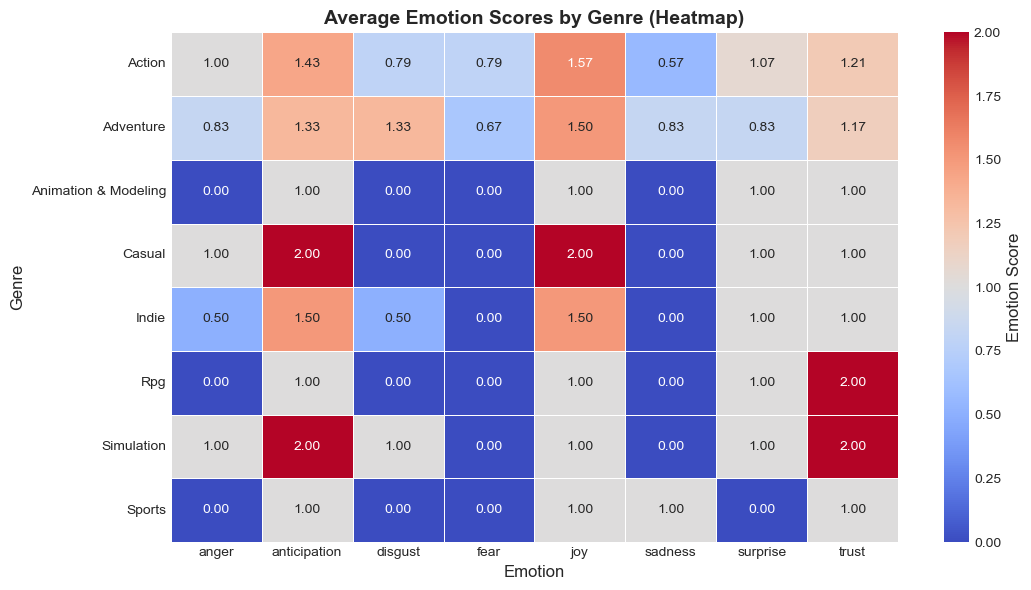

In [22]:
# Use the emotion-level dataset (from Notebook 05)
df_full = df_emotion.copy()

# Emotion columns to include
emotion_cols = [
    'anger', 'anticipation', 'disgust',
    'fear', 'joy', 'sadness',
    'surprise', 'trust'
]

available_emotions = [col for col in emotion_cols if col in df_full.columns]
print("✅ Emotion columns found:", available_emotions)

# Merge in primary genre if missing
if 'primary_genre' not in df_full.columns and 'AppID' in df_full.columns:
    df_full = df_full.merge(
        df_genre[['AppID', 'primary_genre']],
        on='AppID',
        how='left'
    )

# Group and average emotion scores by genre
genre_emotion_avg = (
    df_full.groupby('primary_genre')[available_emotions]
    .mean()
    .round(2)
    .sort_index()
)

# Plot the heatmap
if not genre_emotion_avg.empty:
    plt.figure(figsize=(11, 6))
    sns.heatmap(
        genre_emotion_avg,
        cmap="coolwarm",
        annot=True,          # ✅ shows numbers
        fmt=".2f",            # format values to 2 decimals
        linewidths=0.5,
        cbar_kws={"label": "Emotion Score"}
    )

    plt.title("Average Emotion Scores by Genre (Heatmap)", fontsize=14, weight='bold')
    plt.xlabel("Emotion")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No emotion data found for plotting.")

### 🔍 Results: Emotion Intensity Heatmap by Genre  

**Heatmap loaded successfully.**  
Each color block shows how strongly an emotion appears in each genre.

### 🗝️ Key Patterns
- **Action & Adventure** → high **Joy** and **Anticipation**  
  Energetic, fast-paced tone.  
- **Casual & Simulation** → strong **Joy** and **Trust**  
  Relaxing, gentle, safe experiences.  
- **RPG & Indie** → higher **Anticipation** and **Trust**  
  Story focus, exploration, empathy.  
- **Animation & Sports** → low emotional variance  
  Lighter or more niche engagement. 

### ❓ How to read it
- Warm colors (orange–red) → stronger emotion  
- Cool colors (blue) → calmer tone or low intensity  
- Each genre shows a unique **emotional fingerprint**.

#### ➡️ Next step  
We’ll connect these emotional trends back to **relief tags**  
to see which emotions dominate comfort, catharsis, distraction, or validation.  

---

## 7. Word Cloud by Relief Type

Creating **word clouds** to show the most common words  
used in reviews for each relief type  
(Comfort, Catharsis, Distraction, Validation).

### 🔍 What this reveals
- Key themes players mention in each relief category  
- Words tied to calm, intense, or validating experiences  
- How language shifts across emotional tones  

Each relief type gets its own cloud.  
Bigger words = more frequently used.

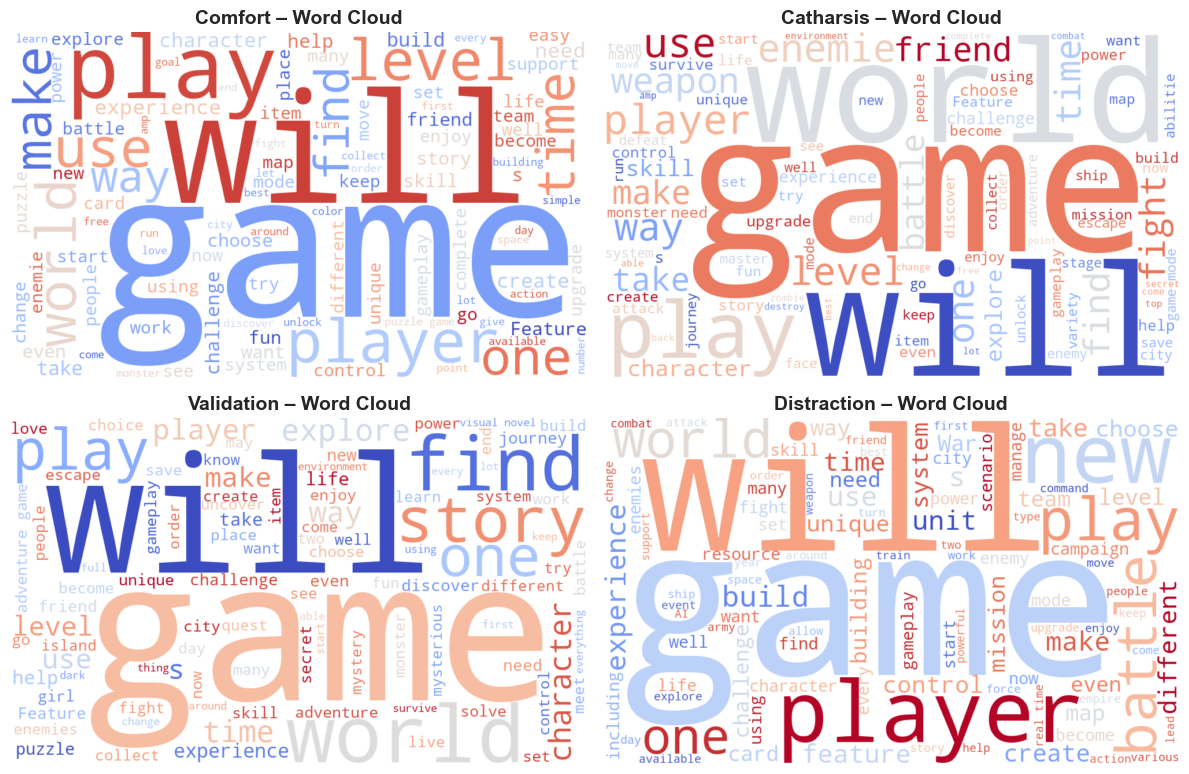

In [24]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Check if 'relief_tag' and 'About the game' columns exist
if 'relief_tag' in df_genre.columns and 'About the game' in df_genre.columns:
    
    # Get all unique relief types
    relief_types = df_genre['relief_tag'].dropna().unique()
    
    # Set up plot layout
    plt.figure(figsize=(12, 8))
    
    for i, tag in enumerate(relief_types, 1):
        # Collect all text for this relief tag
        text_data = " ".join(df_genre[df_genre['relief_tag'] == tag]['About the game'].dropna())
        
        # Skip if there isn't enough text
        if len(text_data.split()) < 10:
            continue
        
        # Create word cloud
        wc = WordCloud(
            width=1000,
            height=600,
            background_color='white',
            colormap='coolwarm',
            max_words=100
        ).generate(text_data)
        
        # Plot
        plt.subplot(2, 2, i)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{tag} – Word Cloud", fontsize=14, weight='bold')
    
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ Missing columns: make sure 'relief_tag' and 'About the game' are in df_genre.")

### 🔍 Results: Word Cloud by Relief Type

Word clouds loaded successfully.  
Each relief type shows a clear language pattern in player reviews.

#### Quick takeaways  
- **Comfort** → “play,” “make,” “level,” “build”  
  Calm, creative, routine-focused.  
- **Catharsis** → “fight,” “weapon,” “survive,” “battle”  
  Release through challenge and intensity.  
- **Distraction** → “unit,” “map,” “system,” “build”  
  Focus, strategy, and mental engagement.  
- **Validation** → “find,” “story,” “character,” “love”  
  Meaning, empathy, emotional depth.

#### ❓ What this shows  
- Larger words = more frequent  
- Each relief type has its own emotional tone  
- Highlights how players express comfort, escape, and connection 

#### Next step  
Combine genres, emotions, and relief types  
to see how emotional tone shapes the full gaming experience.

---

## 8. Joy-to-Anger Ratio  

A simple measure of balance between **joy** and **anger** in player reviews.  
This highlights how uplifting or cathartic different groups can be.

### Why it matters
- **High ratio** → comfort, calm, positive mood repair  
- **Low ratio** → catharsis, emotional release  
- **Balanced** → challenge paired with satisfaction  

### What this reveals
- Which genres lean toward **positive mood repair**  
- Which relief types encourage **emotional release**  
- How overall emotional tone connects to player coping styles 

### How it works
For each group (genre or relief tag):  
**Joy score ÷ Anger score**  

- More joy → leans toward **Comfort**  
- More anger → leans toward **Catharsis** 

### Insight
This ratio helps show which experiences lift players up  
and which help them release tension.

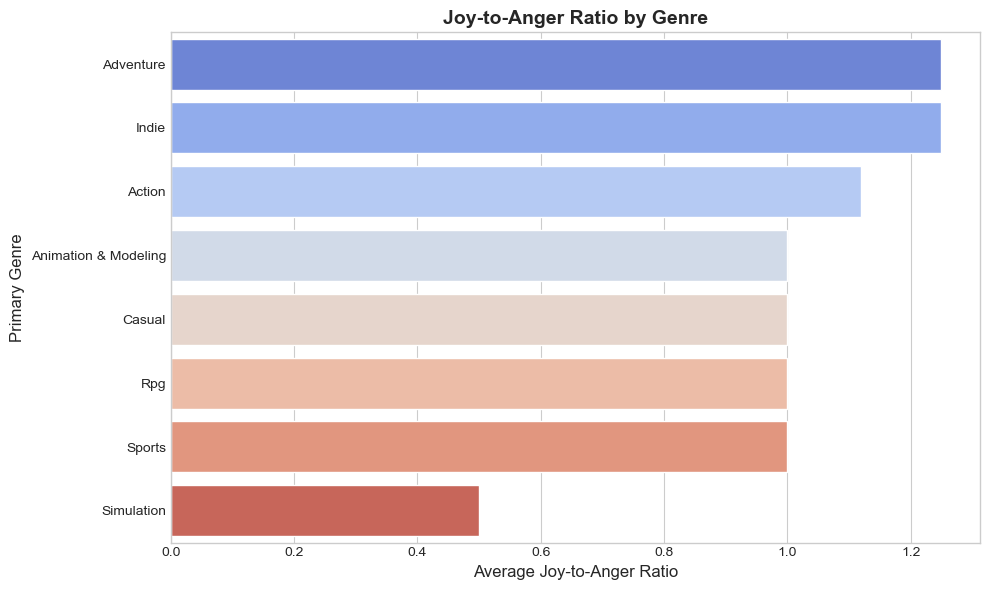

In [28]:
# Make a copy to work safely
df_ratio = df_emotion.copy()

# Ensure emotion columns exist
if {'joy', 'anger'}.issubset(df_ratio.columns):

    # Merge genre info if missing
    if 'primary_genre' not in df_ratio.columns and 'AppID' in df_ratio.columns:
        df_ratio = df_ratio.merge(
            df_genre[['AppID', 'primary_genre']],
            on='AppID',
            how='left'
        )

    # Calculate Joy-to-Anger ratio (add 1 to avoid dividing by zero)
    df_ratio['joy_to_anger_ratio'] = df_ratio['joy'] / (df_ratio['anger'] + 1)

    # Group by genre and average the ratio
    ratio_by_genre = (
        df_ratio.groupby('primary_genre')['joy_to_anger_ratio']
        .mean()
        .round(2)
        .sort_values(ascending=False)
    )

    # Plot without future warnings (assign hue and hide legend)
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=ratio_by_genre.values,
        y=ratio_by_genre.index,
        hue=ratio_by_genre.index,   # needed when using palette
        dodge=False,
        palette="coolwarm",
        legend=False                # hide the hue legend
    )

    plt.title("Joy-to-Anger Ratio by Genre", fontsize=14, weight='bold')
    plt.xlabel("Average Joy-to-Anger Ratio")
    plt.ylabel("Primary Genre")
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ Missing emotion columns: make sure 'joy' and 'anger' exist in df_emotion.")

### 🔍 Results: Joy-to-Anger Ratio by Genre  

Each bar shows how much **joy** outweighs **anger** in player reviews.  
Higher = more uplifting.  
Lower = more tension or intensity.

#### Quick takeaways  
- **Adventure & Indie** → highest ratios  
  Uplifting, inspiring emotional tone.  
- **Action** → moderate balance  
  Challenge with some cathartic release.  
- **Casual & RPG** → steady, balanced mood  
  Consistent enjoyment.  
- **Sports & Simulation** → lowest ratios  
  More competitive or stress-driven tone.

#### ❓ Why this matters
The ratio highlights whether a genre leans toward:  
- **Comfort / Validation** (more joy)  
- **Catharsis** (more anger)

Each genre serves a different emotional purpose.  
Some lift players up, while others help them release tension.

---

## 9. Insights and Observations  

Bringing together emotions, relief tags, and genres  
to see the stories they tell about player experience.  

#### Emotional Patterns  
- **Adventure and Indie** → most positive tone  
  Uplifting, immersive, inspiring.  
- **Action and RPG** → mix of tension and satisfaction  
  Strong catharsis through challenge.  
- **Simulation and Sports** → lower positivity  
  Focus on control, performance, and steady focus. 

#### Relief Dynamics  
- **Comfort** → calm, creative language  
- **Catharsis** → intensity, action, release  
- **Validation** → connection, meaning, empathy  
- **Distraction** → systems, maps, structure, mental reset 

#### 🗝️ Key Takeaway  
Each genre has its own emotional purpose.  
Some lift players up, while others help them process or let go.

Relief in games is not just about fun  
but about restoring emotional balance.  

---

## 10. Export Final Datasets  

Saving both cleaned datasets for reuse  
in future notebooks and the Streamlit app.

#### 💡 Why this matters
- Keeps visual-ready data organized  
- Avoids reprocessing large emotion files  
- Helps the app load faster and run smoothly  

#### 📂 Files to save
- `df_viz` → for genre + relief visuals  
- `df_full` → for emotion intensity visuals 

In [29]:
# Export simplified dataset for genre + relief visuals
df_viz.to_csv("../02 Data/cleaned/07_genre_relief_viz_ready.csv", index=False)

# Export full dataset for emotion intensity and ratios
df_full.to_csv("../02 Data/cleaned/07_emotion_relief_full_ready.csv", index=False)

print("✅ Datasets exported successfully!")
print("Saved as:")
print("- 07_genre_relief_viz_ready.csv")
print("- 07_emotion_relief_full_ready.csv")

✅ Datasets exported successfully!
Saved as:
- 07_genre_relief_viz_ready.csv
- 07_emotion_relief_full_ready.csv


---

## 11. Next Steps  

This notebook wraps up the **genre–emotion visualization phase** of GameRx,  
turning hybrid datasets into clear visuals that connect emotion, relief, and genre.

#### What was completed
- Top genres for each relief type (Comfort, Catharsis, Distraction, Validation)  
- Emotion intensity heatmaps  
- Word clouds showing emotional language  
- Joy-to-Anger ratios for positivity vs. catharsis  
- Exported visual-ready datasets for further analysis  

These visual insights bridge **emotional psychology** with **gameplay patterns**,  
setting the stage for deeper emotional understanding.

#### ➡️ Next Step
Move into discovering **emotional clusters** within the data.

In **08_clustering_analysis.ipynb**, the focus will be on grouping games  
with similar emotional and relief patterns to reveal natural categories  
of comfort, catharsis, distraction, and validation across genres.